In [61]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# **Loading** **and** **Exploring** **Data**

In [5]:
df=pd.read_csv('train.csv.zip')
df.head()


C:\Users\preet\AppData\Local\Temp\ipykernel_2496\2561800754.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv.zip')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# **Dropping** **Irrelevant** **Features**

In [6]:
credit_info=df.copy()


In [7]:
credit_info.drop(['ID','Customer_ID','Month','Name','Type_of_Loan','Credit_History_Age','SSN'],axis=1,inplace=True)

In [8]:
credit_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

# **Handling** **Missing** **Values**

In [9]:
import seaborn as sns

<Axes: >

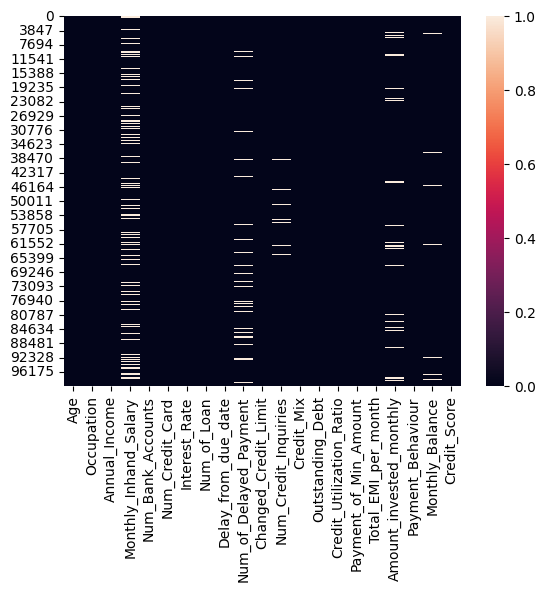

In [10]:
sns.heatmap(credit_info.isnull())

In [11]:
credit_info.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# **Checking** **for** **Duplicates**

In [12]:
credit_info.duplicated().sum()

0

# **Dropping** **all** **observations** **with** **more** **than** **3** **missing** **values**

In [13]:
size_before_cleaning=credit_info.shape
credit_info=credit_info[credit_info.isnull().sum(axis=1)<3]
print("{} Records dropped".format(size_before_cleaning[0]-credit_info.shape[0]))

101 Records dropped


In [14]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)
        

In [15]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [16]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [17]:
credit_info["Amount_invested_monthly"]=credit_info["Amount_invested_monthly"].apply(Amount_invested_monthly)
credit_info["Amount_invested_monthly"]=credit_info["Amount_invested_monthly"].astype("float")

In [18]:
credit_info["Changed_Credit_Limit"]=credit_info["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
credit_info.drop(credit_info[credit_info["Changed_Credit_Limit"]=="_"].index,inplace=True)
credit_info["Changed_Credit_Limit"]=credit_info["Changed_Credit_Limit"].astype("float")

In [19]:
credit_info.drop(credit_info[credit_info["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    credit_info[i] = credit_info[i].apply(filter_general)
    credit_info[i] = credit_info[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [20]:
credit_info['Num_of_Delayed_Payment'] = credit_info['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
credit_info['Num_of_Delayed_Payment'] = credit_info['Num_of_Delayed_Payment'].astype(np.float64)

In [21]:
credit_info['Occupation'] = credit_info['Occupation'].replace('_______', np.nan)
credit_info['Occupation'] = credit_info['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [22]:
credit_info['Credit_Mix'] = credit_info['Credit_Mix'].replace('_', np.nan)
credit_info['Credit_Mix'] = credit_info['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [23]:
credit_info['Payment_of_Min_Amount'] = credit_info['Payment_of_Min_Amount'].replace('NM', np.nan)
credit_info['Payment_of_Min_Amount'] = credit_info['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [24]:
credit_info['Payment_Behaviour'] = credit_info['Payment_Behaviour'].replace('!@9#%8', np.nan)
credit_info['Payment_Behaviour'] = credit_info['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [25]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    credit_info[i].fillna(credit_info[i].median(), inplace=True)

In [26]:
credit_info['Monthly_Balance'].fillna(credit_info['Monthly_Balance'].median(), inplace=True)

# **Data** **Visualization** **and** **Statistical** **insights**

In [27]:
credit_info.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe U'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97799.000000,97799,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Scientist,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Standard,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,13064,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,55452,nan,nan,62894,nan,nan,24921,nan,52020
mean,119.985153,nan,175441.663404,4027.005640,17.087404,22.518891,72.289103,10.747370,21.073150,29.809957,10.464173,27.318183,nan,1426.299152,32.282054,nan,1406.498229,615.602370,nan,401.639906,nan
std,687.568412,nan,1422851.517850,2961.624830,117.233274,129.222276,466.472121,61.596415,14.866001,218.435605,6.668569,191.044206,nan,1155.320700,5.114341,nan,8312.094625,2001.490408,nan,212.574825,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1789.873333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049940,nan,30.319985,76.913387,nan,270.916082,nan
50%,34.000000,nan,37551.780000,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.230000,32.301174,nan,69.246684,135.770733,nan,336.652588,nan
75%,42.000000,nan,72740.960000,5371.220000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,nan,1945.675000,36.491492,nan,161.373123,254.946349,nan,467.500431,nan


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

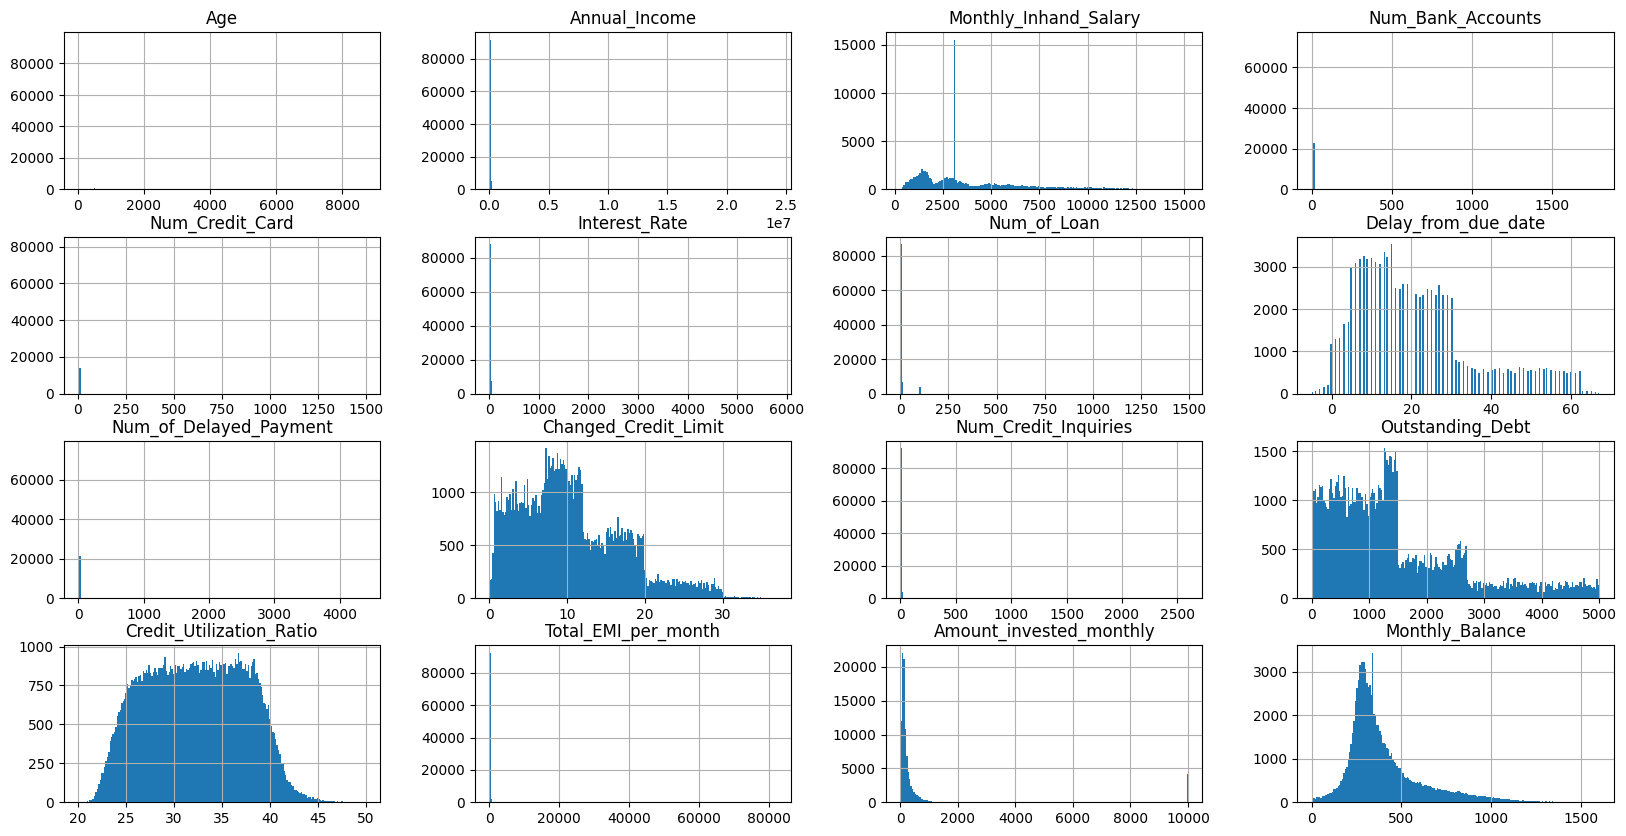

In [28]:
credit_info.hist(bins=200,figsize=[20,10])

In [29]:
import matplotlib.pyplot as plt 

In [30]:
def pie_plot(df,cols_list,rows,cols):
  fig,axes=plt.subplots(rows,cols)
  for ax, col in zip(axes.ravel(),cols_list):
    df[col].value_count.plot(ax=ax,kind='pie',figsize=(15,15),fontsize=10,autopct='%1.0f%%')
    ax.set_title(str(col),fontsize=12)
    plt.show()

In [31]:
credit_info.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,Standard,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,-1,14.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,5,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,8,4.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good


In [32]:
numeric_cols = credit_info.select_dtypes(exclude = "object").columns
cat_cols = credit_info.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


# **Checking** **multicollinearity** **with** **VIF**

In [33]:
!pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif_df = credit_info[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030047
1,Annual_Income,1.016152
2,Monthly_Inhand_Salary,4.751792
3,Num_Bank_Accounts,1.021315
4,Num_Credit_Card,1.029829
5,Interest_Rate,1.023865
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.436032
8,Num_of_Delayed_Payment,1.018732
9,Changed_Credit_Limit,4.290441


<Axes: >

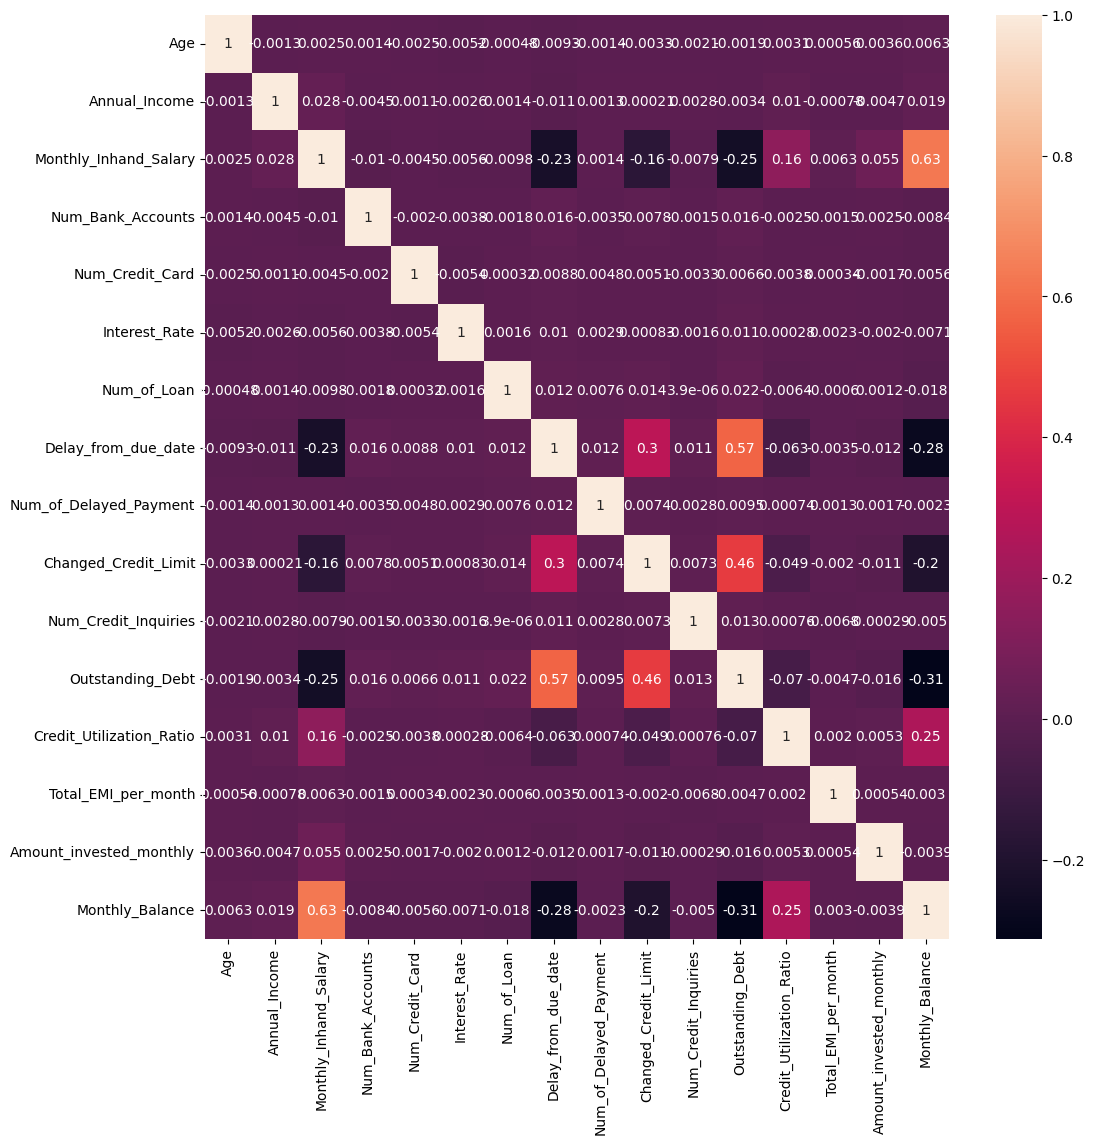

In [35]:
plt.figure(figsize= (12,12))
sns.heatmap(credit_info[numeric_cols].corr(),annot=True)

# **Dealing** **with** **Outliers**

In [36]:
def box_plot(credit_info, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(credit_info[l], palette="flare")

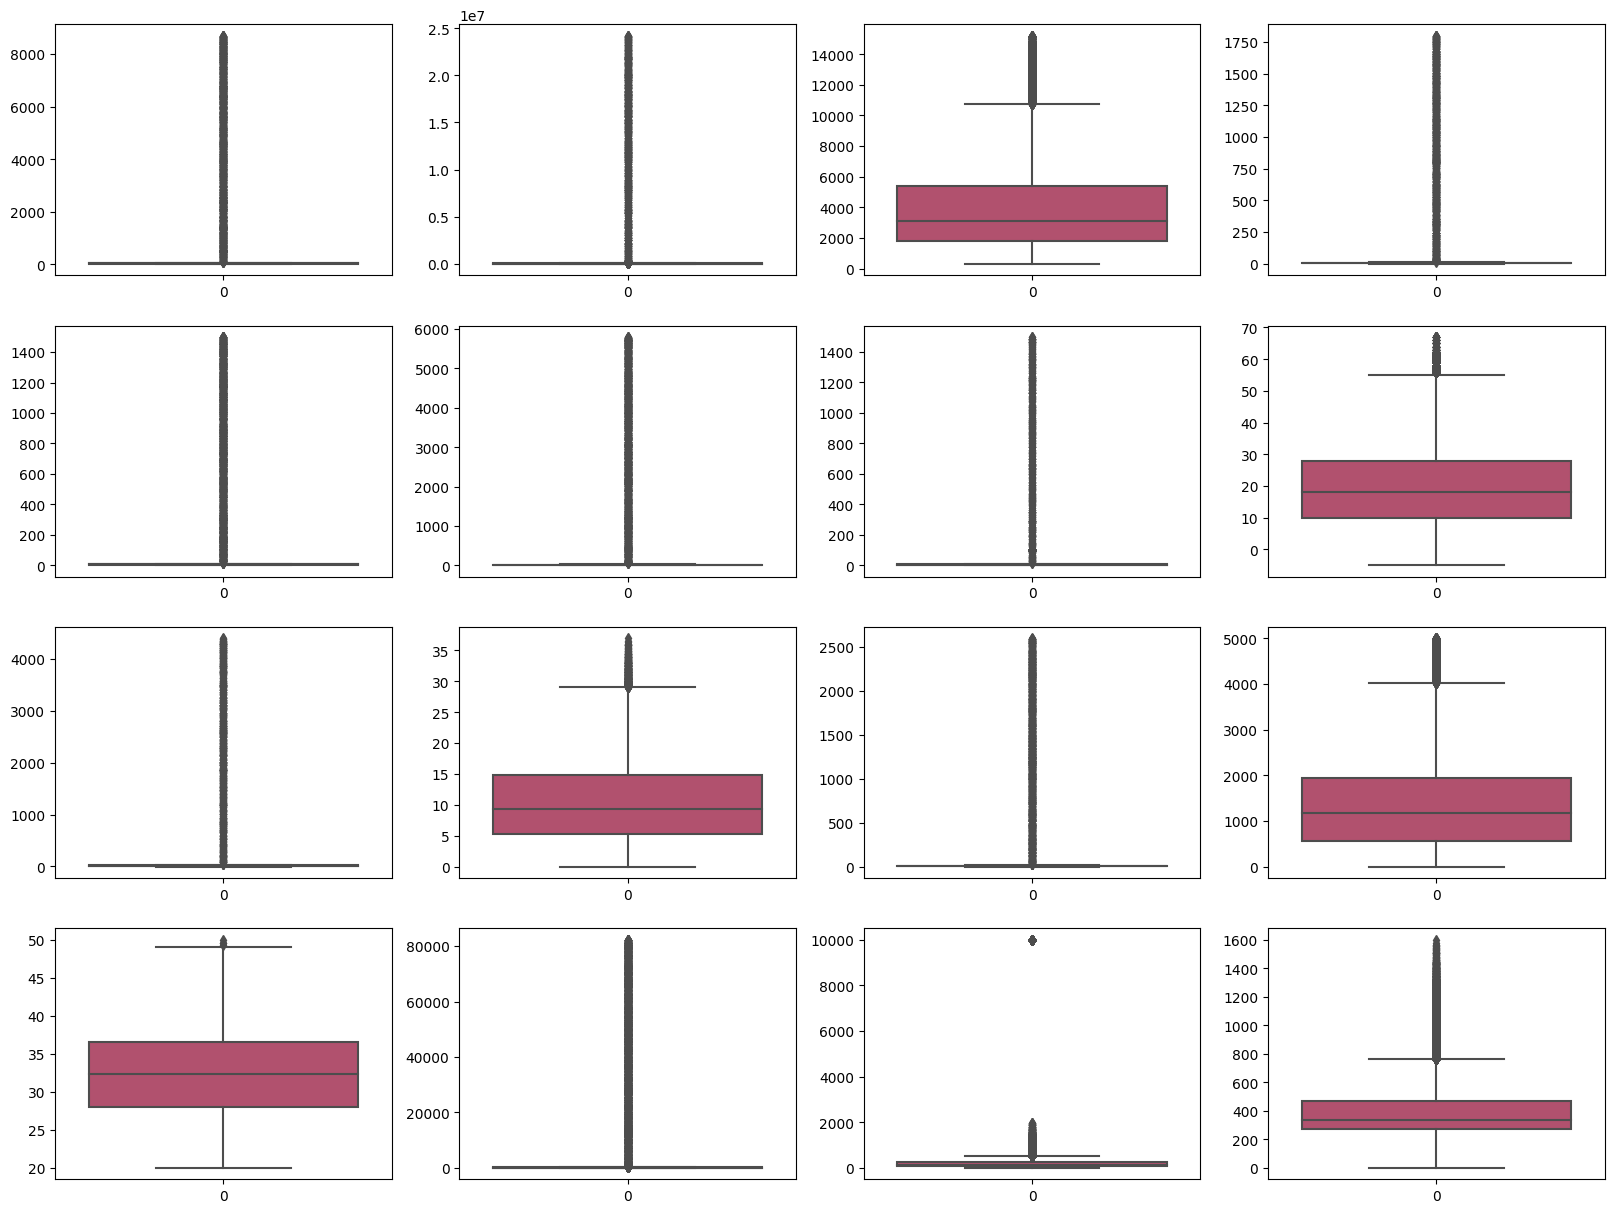

In [37]:
box_plot(credit_info, numeric_cols)

# **IQR**(**Inter** **Quartile** **Range**)

In [38]:
credit_info_n = credit_info.copy()
for i in numeric_cols:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(credit_info_n[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(credit_info_n[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", credit_info_n.shape)
    credit_info_n[numeric_cols] = credit_info_n[numeric_cols][(credit_info_n[i] < Q3) & (credit_info_n[i] > Q1)]
    credit_info_n.dropna(inplace=True)
    print("New Shape: ", credit_info_n.shape)

C:\Users\preet\AppData\Local\Temp\ipykernel_2496\1701403455.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(credit_info_n[i], 0.05,interpolation = 'midpoint')
C:\Users\preet\AppData\Local\Temp\ipykernel_2496\1701403455.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(credit_info_n[i], 99.95,interpolation = 'midpoint')


@ Feature Age...
Old Shape:  (97799, 21)
New Shape:  (96598, 21)
@ Feature Annual_Income...
Old Shape:  (96598, 21)
New Shape:  (96500, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (96500, 21)
New Shape:  (96402, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (96402, 21)
New Shape:  (92102, 21)
@ Feature Num_Credit_Card...
Old Shape:  (92102, 21)
New Shape:  (90260, 21)
@ Feature Interest_Rate...
Old Shape:  (90260, 21)
New Shape:  (88056, 21)
@ Feature Num_of_Loan...
Old Shape:  (88056, 21)
New Shape:  (79171, 21)
@ Feature Delay_from_due_date...
Old Shape:  (79171, 21)
New Shape:  (79076, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (79076, 21)
New Shape:  (78994, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (78994, 21)
New Shape:  (78909, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (78909, 21)
New Shape:  (74152, 21)
@ Feature Outstanding_Debt...
Old Shape:  (74152, 21)
New Shape:  (74068, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (74068, 21)
New 

In [39]:
credit_info_n.drop(credit_info_n[credit_info_n["Age"] >= 80].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Annual_Income"] >= 500000].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Num_Bank_Accounts"] >= 20].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Num_Credit_Card"] >= 50].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Num_of_Loan"] >= 20].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Interest_Rate"] >= 35].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Num_Credit_Inquiries"] >= 100].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Total_EMI_per_month"] >= 2000].index, inplace=True)
credit_info_n.drop(credit_info_n[credit_info_n["Amount_invested_monthly"] >= 1000].index, inplace=True)

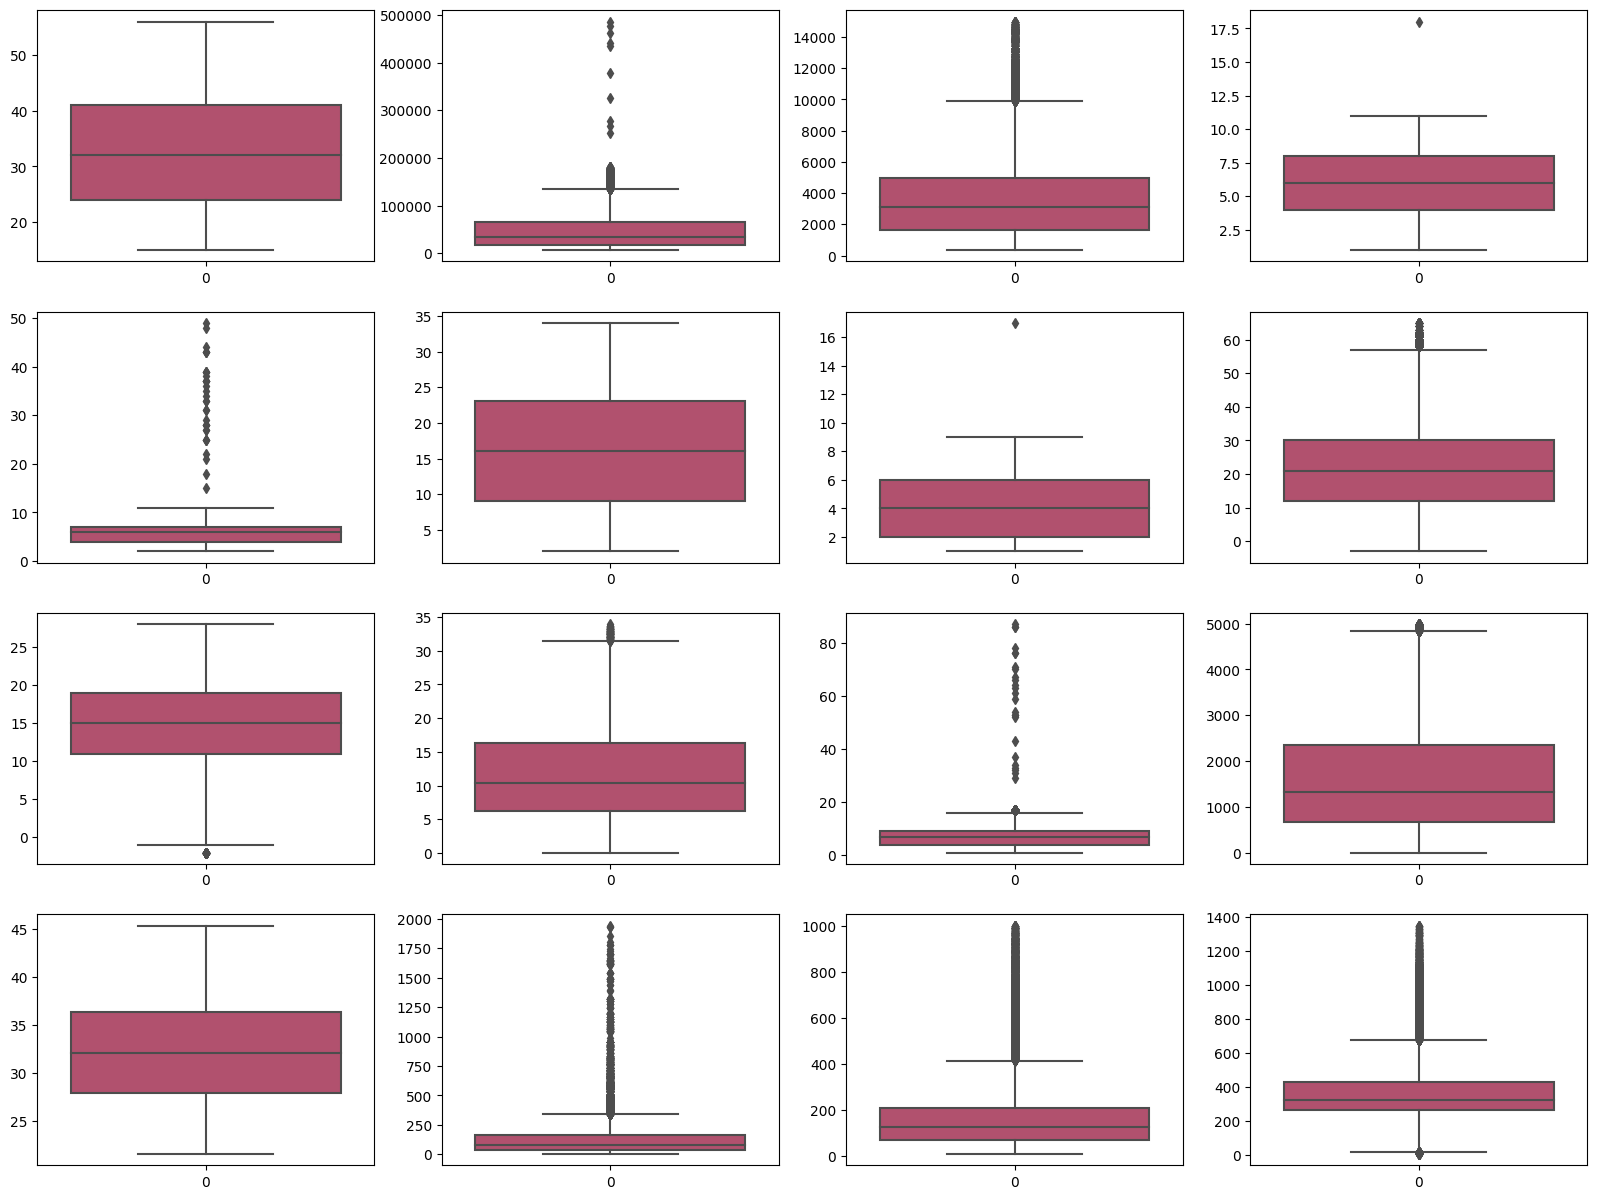

In [40]:
box_plot(credit_info_n, numeric_cols)

# **Handling** **numirical** **data**

In [41]:
df_num_clean = credit_info_n[numeric_cols].copy()

In [42]:
from sklearn import preprocessing

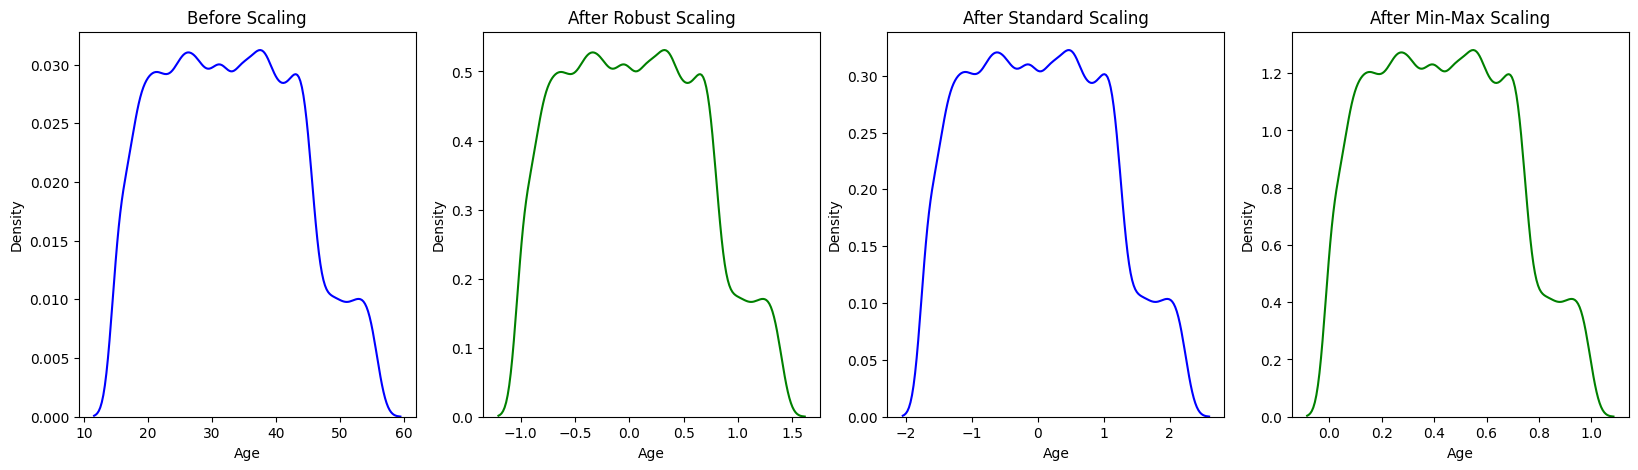

In [43]:
cols = numeric_cols
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)
  
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(df_num_clean['Age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df_['Age'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['Age'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['Age'], ax = ax4, color ='g')
plt.show()

In [44]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [45]:
robust_scaled = RobustScaling(df_num_clean, numeric_cols)

In [46]:
robust_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.888889,-1.375,-0.399405,-0.6,-0.312965,-0.084491,-0.223513,0.526322,-0.589813
3,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015


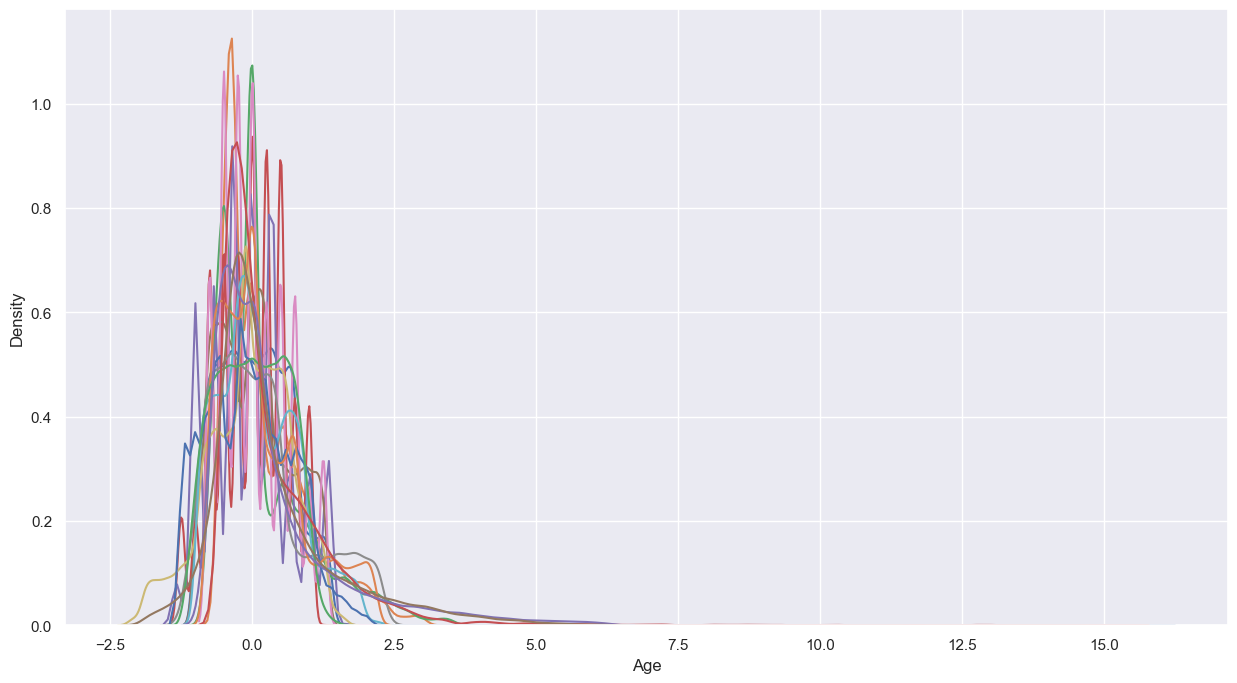

In [47]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [48]:
clean_df = credit_info.copy()
clean_df.drop(labels=numeric_cols, axis="columns", inplace=True)
clean_df[numeric_cols] = robust_scaled[numeric_cols]

In [49]:
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Standard,No,High_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,...,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,...,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,...,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,...,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015
5,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,...,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205


# **Categorical** **Data** **Encoding**

In [50]:
clean_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
clean_df = pd.get_dummies(clean_df, columns = ['Occupation', 'Payment_Behaviour'])

In [51]:
for i in numeric_cols:
    clean_df[i].fillna(method='ffill', inplace=True)

In [52]:
clean_df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,False,True,False,False,False,False,True,False,False,False
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,False,True,False,False,False,False,False,True,False,False
3,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,False,True,False,False,False,False,False,False,False,True
4,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,...,False,True,False,False,False,True,False,False,False,False
5,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,...,False,True,False,False,False,True,False,False,False,False


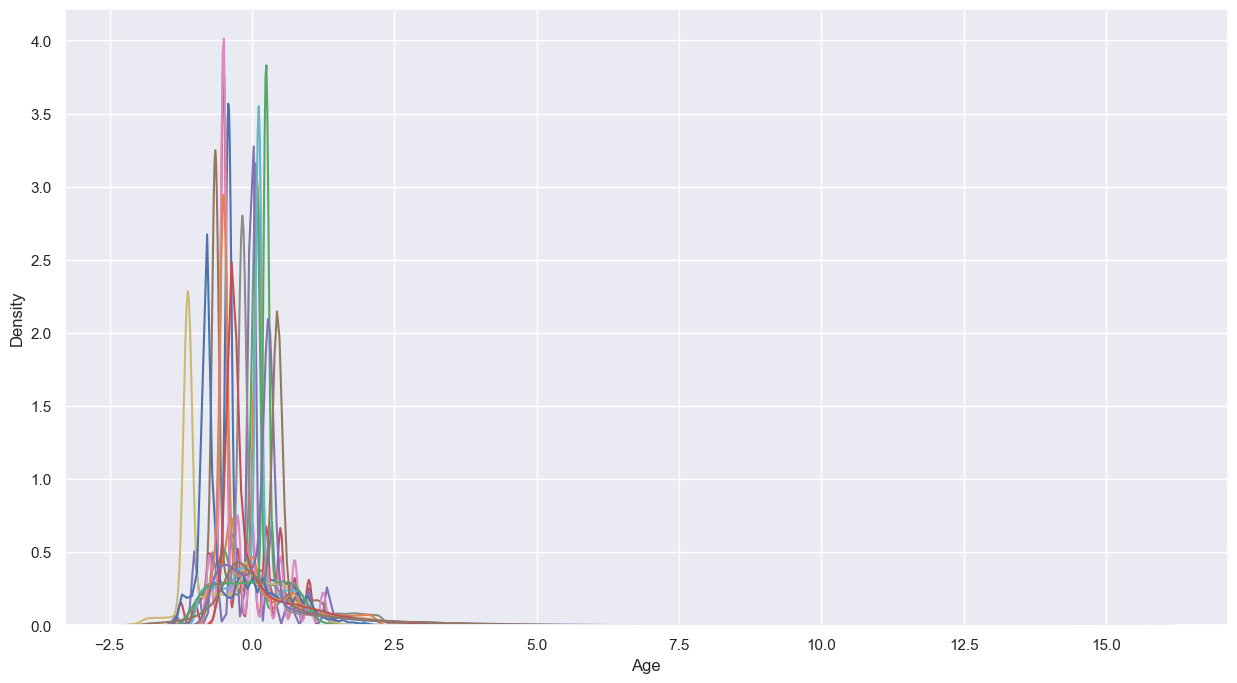

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(clean_df[i], legend=True)

# **Final** **Model**

In [54]:
!pip install scikit-learn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn .metrics import accuracy_score
from sklearn import metrics

In [55]:
x_clean = clean_df.drop(['Credit_Score'] , axis = 1).values
y_clean = clean_df['Credit_Score'].values

In [56]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x_clean)
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 39 and of reduced features is 34


In [57]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_reduced, y_clean, test_size=0.2, random_state=42)

In [58]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [ ]:
# Instantiate the SVM classifier
model = svm.SVC()

# Train the model
model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
y_pred = model.predict(X_test_clean)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
evaluate_classification(clf, "HistGradientBoostingClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

In [ ]:
from joblib import dump

In [ ]:
dump(clf, './../savedModels/clf.joblib')